## 1. Package Loading

In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## 2. Hyperparameter 세팅

In [2]:
batch_size = 100
num_epochs = 5
learning_rate = 0.001

## 3. Dataset 및 DataLoader 할당

In [7]:
root = './data'
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.5,), std=(0.5,))])
train_data = dset.FashionMNIST(root=root, train=True, transform = transform, download=True)
test_data = dset.FashionMNIST(root=root, train=True, transform = transform, download=True)
train_loader = torch.utils.data.DataLoader(
                dataset = train_data,
                batch_size = batch_size,
                shuffle = True)
test_loader = torch.utils.data.DataLoader(
                dataset = test_data,
                batch_size = batch_size,
                shuffle = True)

## 4. Data Sample Visualization

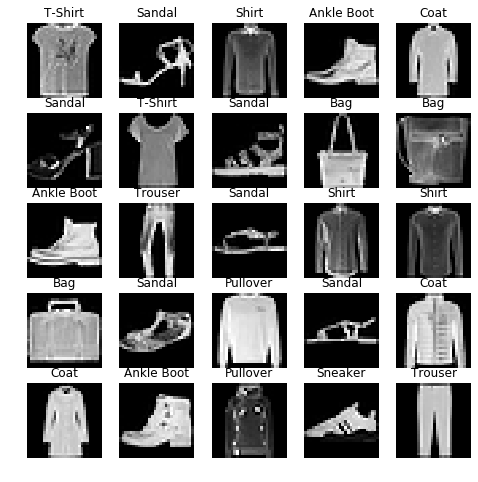

In [29]:
labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt',
              7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'}

columns = 5
rows = 5
fig = plt.figure (figsize = (8,8))

for i in range(1, columns*rows+1):
    data_idx = np.random.randint(len(train_data))
    img = train_data[data_idx][0][0,:,:].numpy()
    label = labels_map[train_data[data_idx][1].item()]
    
    fig.add_subplot(rows, columns, i)
    plt.title(label)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.show()

## 5. NN Design

In [34]:
class DNN(nn.Module):
    def __init__(self, num_classes=10):
        super(DNN, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.BatchNorm1d(512),
            nn.ReLU()
        )
        
        self.layer2 = nn.Sequential(
            nn.Linear(512, num_classes),
            nn.ReLU()
        )
        
    def forward(self, x):
        x = x.view(x.size(0),-1)
        x_out = self.layer1(x)
        x_out = self.layer2(x_out)
        return x_out

## 6. Weight Initialization

In [39]:
def weights_init(m):
    if isinstance(m,nn.Linear):
        nn.init.xavier_normal_(m.weight)
        print(m.weight)

## 7. Modeling

In [40]:
model = DNN()
model.apply(weights_init)

Parameter containing:
tensor([[-0.0091, -0.0206, -0.0262,  ...,  0.0060,  0.0309, -0.0586],
        [ 0.0411,  0.0123, -0.0536,  ...,  0.0837, -0.0208, -0.0171],
        [-0.0259,  0.0064,  0.0062,  ..., -0.0055,  0.0263, -0.0480],
        ...,
        [ 0.0037,  0.0476, -0.0227,  ..., -0.0057, -0.0161,  0.0287],
        [ 0.0456, -0.0301,  0.0286,  ...,  0.0336,  0.0275, -0.0034],
        [-0.0260,  0.0297, -0.0516,  ..., -0.0193, -0.0322, -0.0047]],
       requires_grad=True)
Parameter containing:
tensor([[ 0.0131,  0.0102,  0.0379,  ...,  0.0002, -0.0157,  0.0273],
        [ 0.0940,  0.0003, -0.1203,  ..., -0.0603,  0.0224,  0.0089],
        [ 0.0051,  0.0446, -0.0350,  ..., -0.0110, -0.0360, -0.0671],
        ...,
        [ 0.1265, -0.0975,  0.0580,  ...,  0.0900, -0.0247,  0.0479],
        [-0.0250,  0.0207, -0.0055,  ...,  0.0161,  0.0702,  0.0626],
        [-0.0167, -0.0694,  0.0125,  ..., -0.0218, -0.0361, -0.0408]],
       requires_grad=True)


DNN(
  (layer1): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer2): Sequential(
    (0): Linear(in_features=512, out_features=10, bias=True)
    (1): ReLU()
  )
)

## 8. Loss Function and Optimizer

In [42]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

## 9. Training

In [44]:
for epoch in range(num_epochs):
    for i, (imgs, labels) in enumerate(train_loader):
        
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        _, argmax = torch.max(outputs, 1)
        accuracy = (labels == argmax).float().mean()
        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'.format(
                epoch+1, num_epochs, i+1, len(train_loader), loss.item(), accuracy.item() * 100))
            

Epoch [1/5], Step [100/600], Loss: 0.8519, Accuracy: 74.00%
Epoch [1/5], Step [200/600], Loss: 0.6562, Accuracy: 80.00%
Epoch [1/5], Step [300/600], Loss: 0.8669, Accuracy: 76.00%
Epoch [1/5], Step [400/600], Loss: 0.6049, Accuracy: 82.00%
Epoch [1/5], Step [500/600], Loss: 0.6053, Accuracy: 81.00%
Epoch [1/5], Step [600/600], Loss: 0.5947, Accuracy: 80.00%
Epoch [2/5], Step [100/600], Loss: 0.7362, Accuracy: 79.00%
Epoch [2/5], Step [200/600], Loss: 0.5543, Accuracy: 83.00%
Epoch [2/5], Step [300/600], Loss: 0.5708, Accuracy: 83.00%
Epoch [2/5], Step [400/600], Loss: 0.4780, Accuracy: 84.00%
Epoch [2/5], Step [500/600], Loss: 0.6231, Accuracy: 80.00%
Epoch [2/5], Step [600/600], Loss: 0.4530, Accuracy: 86.00%
Epoch [3/5], Step [100/600], Loss: 0.3354, Accuracy: 88.00%
Epoch [3/5], Step [200/600], Loss: 0.2789, Accuracy: 94.00%
Epoch [3/5], Step [300/600], Loss: 0.6462, Accuracy: 80.00%
Epoch [3/5], Step [400/600], Loss: 0.5463, Accuracy: 84.00%
Epoch [3/5], Step [500/600], Loss: 0.488

In [45]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for i, (imgs, labels) in enumerate(test_loader):
        outputs = model(imgs)
        _, argmax = torch.max(outputs, 1) # max()를 통해 최종 출력이 가장 높은 class 선택
        total += imgs.size(0)
        correct += (labels == argmax).sum().item()
    
    print('Test accuracy for {} images: {:.2f}%'.format(total, correct / total * 100))
model.train()

Test accuracy for 60000 images: 85.24%


DNN(
  (layer1): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer2): Sequential(
    (0): Linear(in_features=512, out_features=10, bias=True)
    (1): ReLU()
  )
)